# Generate MURA -- Modified Uniformly Redundant Arrays

The purpose of this notebook is to generate MURAs as defined by Gottesman and Fenimore (1989) in “New family of binary arrays for coded aperture imaging”. These MURAs will be used in the pre-processing step of the MNIST data to make encode the training data and make he images irrecognizable. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

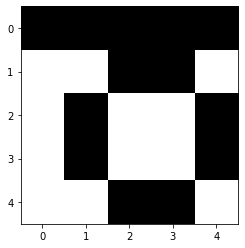

In [7]:
# A is the 5x5 MURA aperture
A = [[0,0,0,0,0], [1,1,0,0,1], [1,0,1,1,0], [1,0,1,1,0],[1,1,0,0,1]]
plt.imshow(A, cmap='gray')
plt.show()

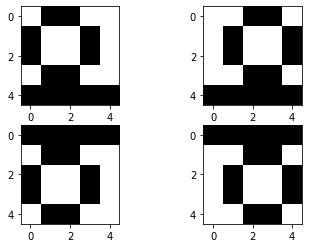

In [8]:
# A[::-1] is all items in the array, reversed
fig, axs = plt.subplots(2,2)
axs = axs.ravel()
axs[0].imshow(np.fliplr(A[::-1]), cmap='gray')
axs[1].imshow(A[::-1], cmap='gray')
axs[2].imshow(np.fliplr(A), cmap='gray')
axs[3].imshow(A, cmap='gray')

In [9]:
np.stack((A,A[::-1]), axis=1)

array([[[0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1]],

       [[1, 1, 0, 0, 1],
        [1, 0, 1, 1, 0]],

       [[1, 0, 1, 1, 0],
        [1, 0, 1, 1, 0]],

       [[1, 0, 1, 1, 0],
        [1, 1, 0, 0, 1]],

       [[1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0]]])

# Define encoding function

In [16]:
def create_binary_aperture_arr(p):
    '''
    Inputs
        p: int. prime integer
        
    Output
        A: np.array. Binary aperture array 
    '''
    A = np.zeros((p,p)) # binary aperture array
    # Aperture function p. 4350 in Gottesman and Fenimore (1989)
    for i in range(0,p):
        for j in range(0,p):
            C_i = legendre_symbol(i,p)
            C_j = legendre_symbol(j,p)

            if i == 0:
                A[i,j] = 0
            elif (j == 0 and i != 0):
                A[i,j] = 1
            elif (C_i * C_j) == 1:
                A[i,j] = 1
            else:
                A[i,j] = 0
    return A
                
# copied from https://eli.thegreenplace.net/2009/03/07/computing-modular-square-roots-in-python on 10/05/22
def legendre_symbol(a, p):
    """ Compute the Legendre symbol a|p using
        Euler's criterion. p is a prime, a is
        relatively prime to p (if p divides
        a, then a|p = 0)

        Returns 1 if a has a square root modulo
        p, -1 otherwise.
    """
    ls = pow(a, (p - 1) // 2, p)
    return -1 if ls == p - 1 else ls

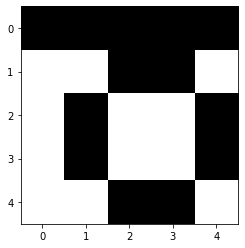

In [17]:
p = 5 # size of array
A = create_binary_aperture_arr(p)
plt.imshow(A, cmap='gray')

# Define decoding function

In [45]:
def create_decoding_arr(A):
    '''
    Inputs
        A: np.array. Binary aperture array
        
    Output
        G: np.array of same size as A. Decoding function 
    '''
    
    G = np.zeros_like(A) # initialize decoding function
    p = G.shape[0]
    
    # Decoding function p. 4350 in Gottesman and Fenimore (1989)
    for i in range(0,p):
        for j in range(0,p):

            if (i + j) == 0:
                G[i,j] = 1
            elif (A[i,j] == 1 and (i + j) != 0):
                G[i,j] = 1
            elif (A[i,j] == 1 and (i + j) != 0):
                G[i,j] = -1
                
    return G

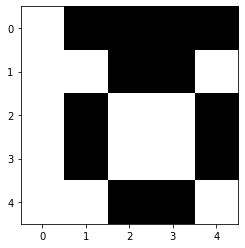

In [46]:
G = create_decoding_arr(A)
plt.imshow(G, cmap='gray')

# Try to create mosaic

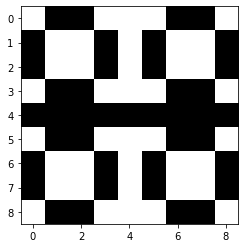

In [52]:
p = 5 # size of array
A = create_binary_aperture_arr(p)
G = create_decoding_arr(A)
h_stack = np.concatenate((A,A), axis=1)
v_stack = np.concatenate((h_stack, h_stack), axis=0)
plt.imshow(v_stack[1:,1:], cmap='gray')

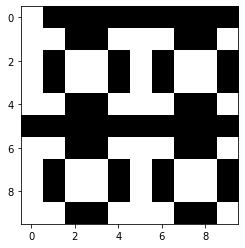

In [53]:
full_decode = create_decoding_arr(v_stack)
plt.imshow(full_decode, cmap='gray')

# Not needed 

In [45]:
# added 10/05/22
# replaced this with a more straigh-forward function with Legendre symbol
def get_quadratic_residues(p):

    # initialize list to store quadratic residues
    quadratic_residues = []

    # get quadratic residues mod p
    # doing this the naive way, with no real tests
    for i in range(1,p):
        quadratic_residues.append(i**2 %p)
        quadratic_residues = list(set(quadratic_residues))
    
    return quadratic_residues